<a href="https://colab.research.google.com/github/SowjanyaKiran/Data_Visualization_EDA_Sowjanya/blob/main/EDA_ZOMATO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Importing the data set
df = pd.read_csv('/content/zomato.csv' , encoding='latin-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
#Getting an idea about the columns names
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
#Getting an idea about duplicates in the data
df.duplicated().sum()

np.int64(0)

In [7]:
#Getting an idea about data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [10]:
#Getting an idea about the shapes of the data
print('Shape :',df.shape)
print('Row :',df.shape[0])
print('Columns :',df.shape[1])

Shape : (9551, 21)
Row : 9551
Columns : 21


In [11]:
# Getting an idea about column wise NULL values
df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [12]:
#Getting an idea about the presence of NULL values in the data
df.isnull().sum().any()

np.True_

In [13]:
#Imputing the missing values in 'Cuisines' column with the mode
df['Cuisines']= df['Cuisines'].fillna(df['Cuisines'].mode()[0])

In [14]:
#Checking the NULL values
df.isnull().sum().any()

np.False_

In [15]:
# Importing the "Country-Code.xlsx" file
df_country = pd.read_excel('/content/Country-Code.xlsx')
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [27]:
# Merging the two dataframes
final_df = pd.merge(df, df_country, on = 'Country Code', how = 'left')
final_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country_x,Country_y
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,No,No,No,4,4.4,Green,Very Good,270,Phillipines,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines,Phillipines


In [28]:
#Checking the NULL values
final_df.isnull().sum().any()

np.False_

In [29]:
#Getting an idea about the datatype
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [30]:
# value_counts() -> proportion of values from each value in the column
final_df['Country_x'].value_counts()

,count
Country_x,
India,8652
United States,434
United Kingdom,80
Brazil,60
South Africa,60
UAE,60
New Zealand,40
Turkey,34
Australia,24


In [31]:
# value_counts() -> proportion of values from each value in the column
final_df['Country_y'].value_counts()

,count
Country_y,
India,8652
United States,434
United Kingdom,80
Brazil,60
South Africa,60
UAE,60
New Zealand,40
Turkey,34
Australia,24


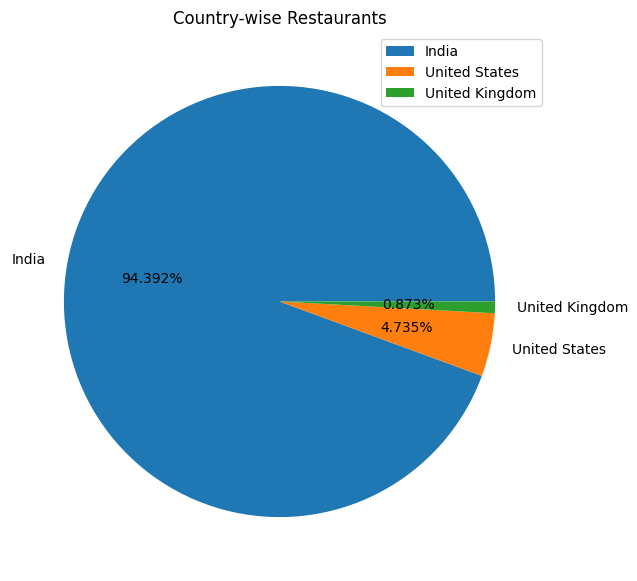

In [32]:
# Pie Chart
country_names = final_df['Country_x'].value_counts().index
country_values = final_df['Country_x'].value_counts().values

# Plot
plt.figure(figsize = (12, 7))
plt.pie(country_values[:3], labels = country_names[:3], autopct = '%.3f%%')
plt.legend()
plt.title('Country-wise Restaurants')
plt.show()

In [33]:
# Average Rating Analysis
ratings = final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index()
ratings.rename(columns = {0 : 'Restaurant Count'}, inplace = True)
print(ratings)

    Aggregate rating Rating color Rating text  Restaurant Count
0                0.0        White   Not rated              2148
1                1.8          Red        Poor                 1
2                1.9          Red        Poor                 2
3                2.0          Red        Poor                 7
4                2.1          Red        Poor                15
5                2.2          Red        Poor                27
6                2.3          Red        Poor                47
7                2.4          Red        Poor                87
8                2.5       Orange     Average               110
9                2.6       Orange     Average               191
10               2.7       Orange     Average               250
11               2.8       Orange     Average               315
12               2.9       Orange     Average               381
13               3.0       Orange     Average               468
14               3.1       Orange     Av

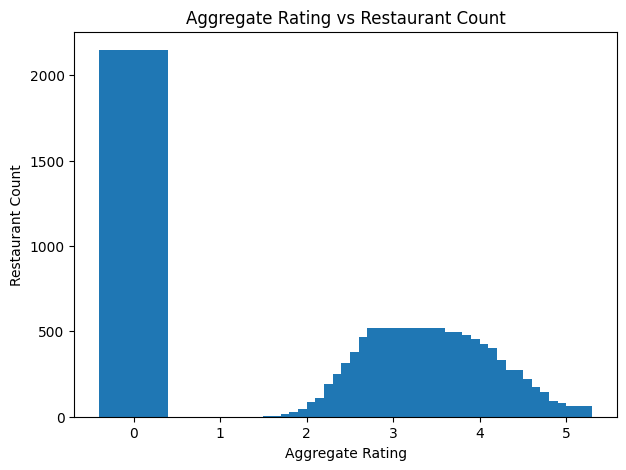

In [34]:
# bar plot using matplotlib
plt.figure(figsize = (7, 5))
plt.bar(x = ratings['Aggregate rating'], height = ratings['Restaurant Count'])
plt.title('Aggregate Rating vs Restaurant Count')
plt.xlabel('Aggregate Rating')
plt.ylabel('Restaurant Count')
plt.show()

<Axes: xlabel='Aggregate rating', ylabel='Restaurant Count'>

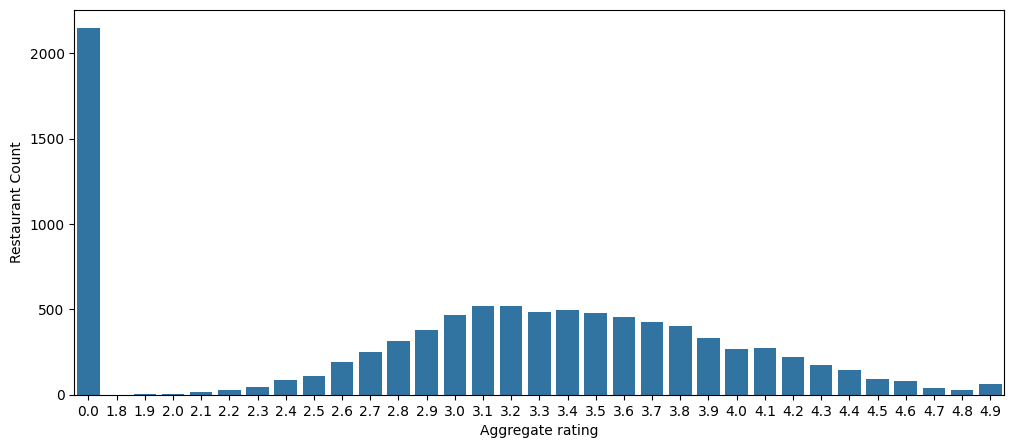

In [35]:
# bar plot using seaborn
plt.figure(figsize = (12, 5))
sns.barplot(x = 'Aggregate rating', y = 'Restaurant Count', data = ratings)

<Axes: xlabel='Aggregate rating', ylabel='Restaurant Count'>

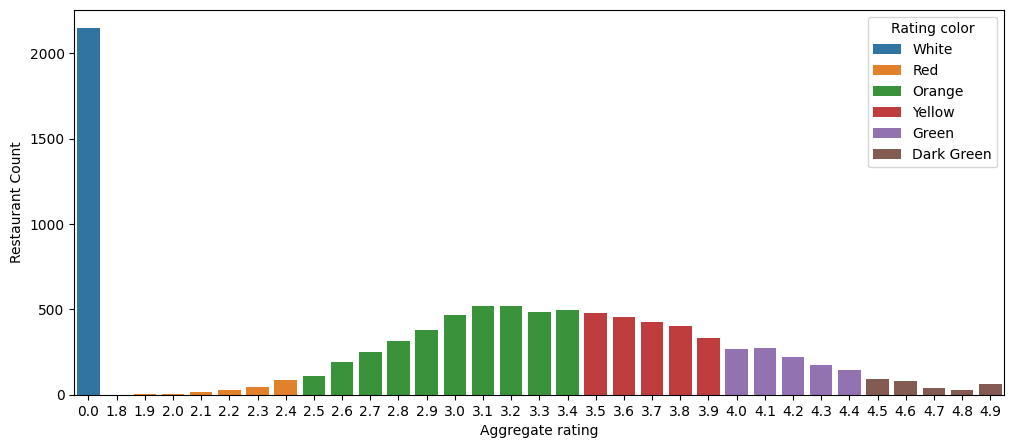

In [36]:
# bar plot using seaborn
plt.figure(figsize = (12, 5))
sns.barplot(x = 'Aggregate rating', y = 'Restaurant Count',
            hue = 'Rating color', data = ratings)

<Axes: xlabel='Aggregate rating', ylabel='Restaurant Count'>

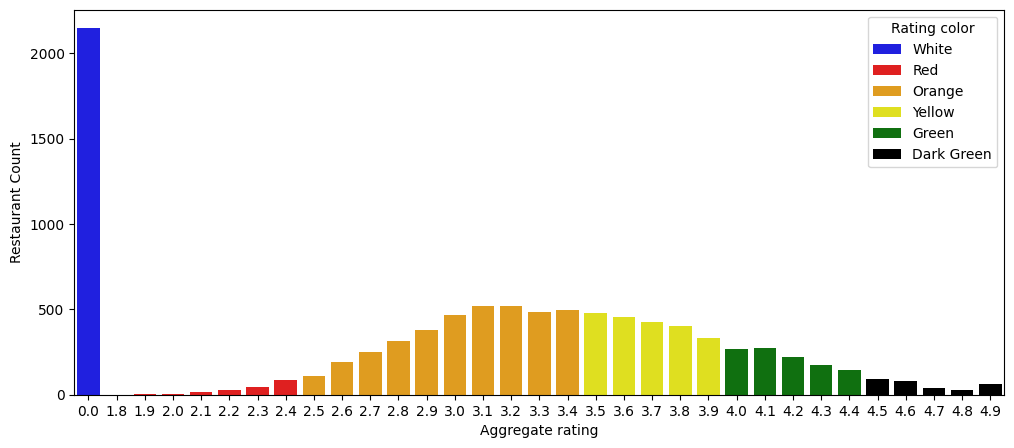

In [37]:
# bar plot using seaborn
plt.figure(figsize = (12, 5))
sns.barplot(x = 'Aggregate rating', y = 'Restaurant Count',
            hue = 'Rating color', palette = ['blue', 'red', 'orange', 'yellow', 'green', 'black'],
            data = ratings)

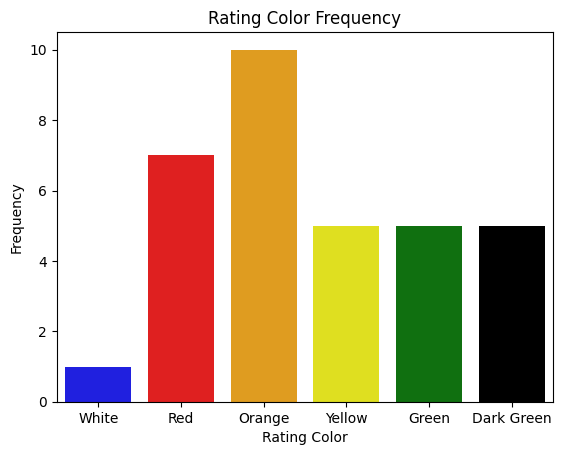

In [38]:
# Count Plot
sns.countplot(x = 'Rating color', data = ratings, palette = ['blue', 'red', 'orange', 'yellow', 'green', 'black'])
plt.title('Rating Color Frequency')
plt.xlabel('Rating Color')
plt.ylabel('Frequency')
plt.show()

In [40]:
# Country Analysis for "White" Rating Color
final_df[final_df['Rating color'] == 'White'].groupby('Country_x').size().reset_index()

,Country_x,0
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


In [42]:
# Analysis
final_df.groupby(['Aggregate rating', 'Country_x']).size().reset_index()

,Aggregate rating,Country_x,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1
...,...,...,...
217,4.9,Sri Lanka,1
218,4.9,Turkey,3
219,4.9,UAE,4
220,4.9,United Kingdom,4


In [45]:
# Currency Analysis
final_df[['Country_x', 'Currency']].groupby(['Country_x', 'Currency']).size().reset_index()

,Country_x,Currency,0
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [46]:
# Online Delivery Analysis
final_df[final_df['Has Online delivery'] == 'Yes']['Country_x'].value_counts()

,count
Country_x,
India,2423
UAE,28


In [47]:
# Top 5 Cities
final_df['City'].value_counts().head(5)

,count
City,
New Delhi,5473
Gurgaon,1118
Noida,1080
Faridabad,251
Ghaziabad,25


In [48]:
# Top 5 Cities
final_df['City'].value_counts(normalize = True).head(5)

,proportion
City,
New Delhi,0.573029
Gurgaon,0.117056
Noida,0.113077
Faridabad,0.026280
Ghaziabad,0.002618


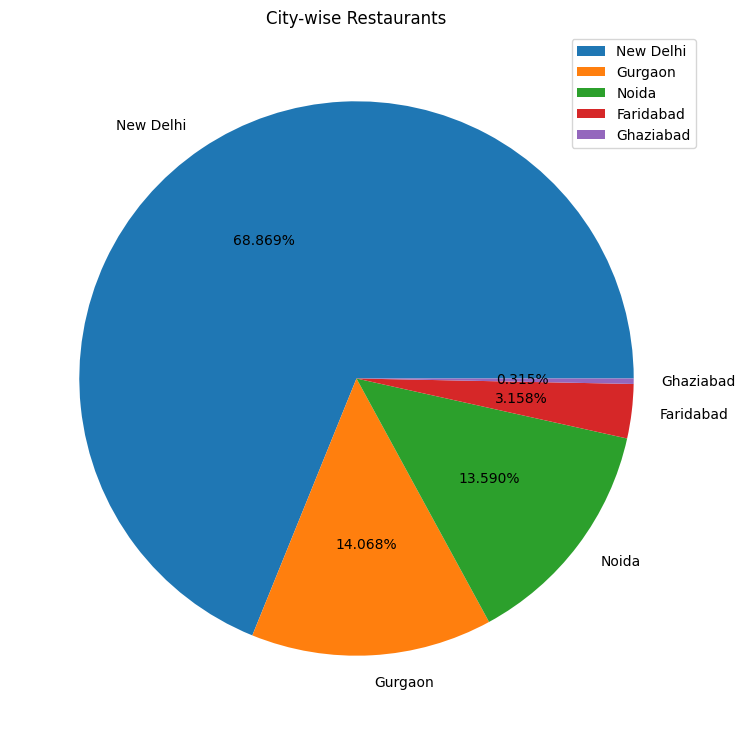

In [49]:
# Pie Chart for City Distribution
city_names = final_df['City'].value_counts().index
city_values = final_df['City'].value_counts().values

# Plot
plt.figure(figsize = (12, 9))
plt.pie(city_values[:5], labels = city_names[:5], autopct = '%.3f%%')
plt.legend()
plt.title('City-wise Restaurants')
plt.show()

In [50]:
# Getting the column names
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country_x', 'Country_y'],
      dtype='object')

<Axes: xlabel='Votes', ylabel='Density'>

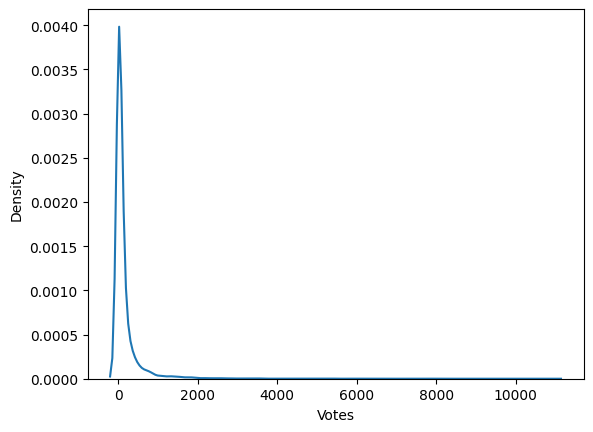

In [51]:
# Density Plot
sns.kdeplot(final_df['Votes'])

<Axes: xlabel='Average Cost for two', ylabel='Density'>

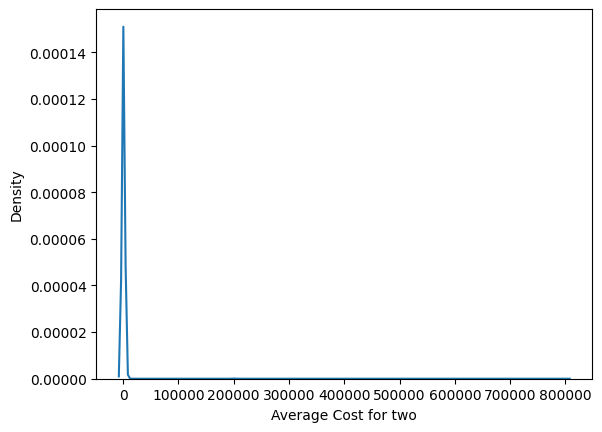

In [52]:
# Density Plot
sns.kdeplot(final_df['Average Cost for two'])

In [53]:
# Getting the maximum value
print(final_df['Average Cost for two'].max())

800000
